<a href="https://colab.research.google.com/github/DMMutua/DMMutua/blob/main/%22Deep_Learning_with_Python_2nd_Edition%22_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE FIRST APPLICATION OF A DL MODEL;

In [2]:
#Downloading the needed dataset; MNIST dataset in Keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Inspecting the training data shape;

train_images.shape

#As per the output, the train_images subset has 60,000 rank-2 
#tensors of 28*28. each matrix is a grayscal image
#with coefficients between 0 and 255

(60000, 28, 28)

In [4]:
#length of the test labels
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

*The Network Architecture;* 

In [5]:
#Importing necessary models and layers
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
# The model
model = models.Sequential([
                           layers.Dense(512, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

In [8]:
#The Compilation Step
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#Preparing the Image Data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [18]:
#"Fitting" the model
#This Online IDE is slow and i intend to use Pycharm to better use the 
#computing power i have on my Laptop
#According to Txtbk Example, Accuracy easily goes past 98.9% with only 5 epochs
model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7215 - accuracy: 0.7927
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7162 - accuracy: 0.7937
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7118 - accuracy: 0.7960
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7065 - accuracy: 0.7958
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7014 - accuracy: 0.7980
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6968 - accuracy: 0.7994
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6920 - accuracy: 0.8022
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6874 - accuracy: 0.8019
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6827 - accuracy: 0.8045
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6783 - accura

In [20]:
#Using the Model to Make Predictions 
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]
#for test_digits[0], this below array is the corresponding probabilities
#that they belong to class i 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
predictions[0].argmax()

7

In [22]:
predictions[0][7]

1.0

In [24]:
#Checking whether test labels agree to the prediction
test_labels[0]

7

On average, how good is the model at classyfying such never-seen-before digits? we check this by computing avergae accuracy over the entire test set

In [25]:
#Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 6776482.0000 - accuracy: 0.2676
test accuracy: 0.26759999990463257


**KEY ATTRIBUTES OF TENSORS**
1.   Number of Axes (rank)
2.   Shape(Describe the no. of dimensions along each axis)
3.   Data Type


*Now, Lets Explore the MNIST dataset;*

In [27]:
#Re-importing the mnist dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
#Displaying the number of axes;
print(train_images.ndim)

3


In [30]:
#Displaying the shape
print(train_images.shape)

(60000, 28, 28)


In [31]:
#Displaying the data type
print(train_images.dtype)

uint8


Thus, the data is a rank-3 tensor of 8-bit integers: 
precisely, an array of 60,000 matrices of 28*28 integers. each matrix is a grayscale image, with coefficients between 0 and 255.

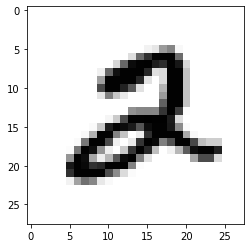

In [32]:
#Displaying the Fifth Digit using matplotlip
digit5 = train_images[5]
import matplotlib.pyplot as plt
plt.imshow(digit5, cmap=plt.cm.binary)
plt.show()

Reached Page 40 on the textbook